# Double-Bracket Iteration Strategy: magnetic field (Ising model)
This notebook shows the diagonalization process of DBI using the magnetic field strategy, which varies the diagonal operator $D$ by gradient descent. To find the gradient with respect to $D$, parameterization of $D$ is required. For the purpose of this notebook, we represent it by the Ising model, i.e.

$$ D = \sum \alpha_i Z_i +\sum \beta_{ij}Z_iZ_j$$


The gradients are calculated under the premise that the diagonalization gain curve can be fitted by a polynomial, and that the iteration step duration is taken at the first dip of the curve.

In [1]:
from copy import deepcopy

import numpy as np
import matplotlib.pyplot as plt

from qibo import hamiltonians, set_backend
from qibo.hamiltonians import Hamiltonian, SymbolicHamiltonian
from qibo.quantum_info import random_hermitian
from qibo.models.dbi.double_bracket import DoubleBracketGeneratorType, DoubleBracketScheduling, DoubleBracketIteration
from qibo.models.dbi.utils import *

In [2]:
def visualize_matrix(matrix, title=""):
    """Visualize hamiltonian in a heatmap form."""
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(title)
    try:
        im = ax.imshow(np.absolute(matrix), cmap="inferno")
    except TypeError:
        im = ax.imshow(np.absolute(matrix.get()), cmap="inferno")
    fig.colorbar(im, ax=ax)


## Test on random Hamiltonian

[Qibo 0.2.7|INFO|2024-04-03 08:21:24]: Using qibojit (numba) backend on /CPU:0


Initial off diagonal norm 31.576176740060667


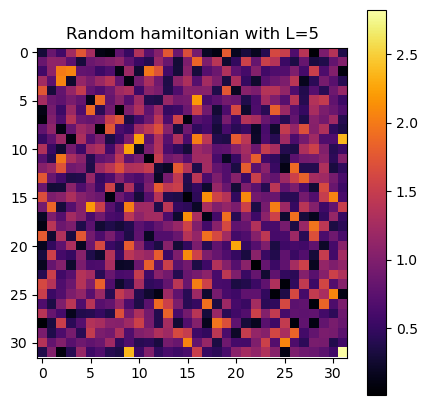

In [32]:
# backend
set_backend("qibojit", platform="numba")
# initialize dbi object
nqubits = 5
h0 = random_hermitian(2**nqubits, seed=2)
scheduling = DoubleBracketScheduling.hyperopt
mode = DoubleBracketGeneratorType.single_commutator
n_taylor = 5
dbi = DoubleBracketIteration(Hamiltonian(nqubits=nqubits, matrix=h0), scheduling=scheduling, mode=mode)
print("Initial off diagonal norm", dbi.off_diagonal_norm)
visualize_matrix(dbi.h.matrix, title=f'Random hamiltonian with L={nqubits}')

### Order 1: $D=\sum \alpha_iZ_i$

In [33]:
# generate pauli_operator_dict
pauli_operator_dict = generate_pauli_operator_dict(nqubits=nqubits, parameterization_order=1)
d_coef = decompose_into_Pauli_basis(dbi.h.matrix, list(pauli_operator_dict.values()))
d = sum([d_coef[i] * list(pauli_operator_dict.values())[i] for i in range(nqubits)])
grad, s = gradient_Pauli(dbi, d=d, pauli_operator_dict=pauli_operator_dict)
print('The initial D coefficients:', d_coef)
print('Gradient:', grad)
print('s:', s)

[Qibo 0.2.7|WARNING|2024-04-03 08:21:25]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:21:25]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:21:25]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:21:25]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:21:25]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


100%|██████████| 500/500 [00:00<00:00, 572.27trial/s, best loss: 27.607173414553387]
The initial D coefficients: [(-0.2980910136757636+0j), (-0.17678355790937256+0j), (0.294550421681131+0j), (-0.2301056409534723+0j), (-0.07297191764284382+0j)]
Gradient: [-0.20481773  0.41841615 -0.03164361  0.18666951 -0.86436728]
s: 0.11659660342715238


/Users/pethidine/Documents/GitHub/qibo/src/qibo/models/dbi/utils.py:268: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[i] = (


In [34]:
iters = 30
off_diagonal_norm_1 = [dbi.off_diagonal_norm]
s_step = [0]
for i in range(iters):
    s, d_coef, d = gradient_descent_pauli(dbi, d_coef=d_coef, d=d, pauli_operator_dict=pauli_operator_dict, max_evals=100)
    dbi(step=s, d=d)
    off_diagonal_norm_1.append(dbi.off_diagonal_norm)
    s_step.append(s)

100%|██████████| 500/500 [00:00<00:00, 710.47trial/s, best loss: 10.063501140769239] 


Text(0, 0.5, '$|| \\sigma(e^{sW}He^{-sW}) || $')

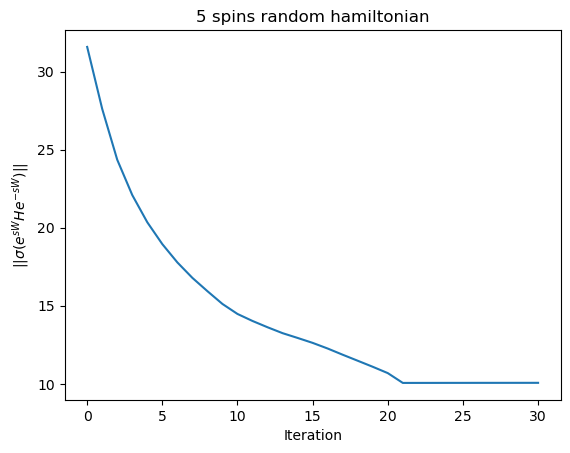

In [36]:
plt.title(str(nqubits) + ' spins random hamiltonian')
plt.plot(off_diagonal_norm_1)
plt.xlabel('Iteration')
plt.ylabel(r'$|| \sigma(e^{sW}He^{-sW}) || $')

### Order 2: $D=\sum \alpha_iZ_i + \beta_{ij}Z_iZ_j$

In [37]:
dbi = DoubleBracketIteration(Hamiltonian(nqubits=nqubits, matrix=h0), scheduling=scheduling, mode=mode)

In [38]:
# generate pauli_operator_dict
pauli_operator_dict = generate_pauli_operator_dict(nqubits=nqubits, parameterization_order=2)
d_coef = decompose_into_Pauli_basis(dbi.h.matrix, list(pauli_operator_dict.values()))
d = sum([d_coef[i] * list(pauli_operator_dict.values())[i] for i in range(nqubits)])
grad, s = gradient_Pauli(dbi, d=d, pauli_operator_dict=pauli_operator_dict)
print('The initial D coefficients:', d_coef)
print('Gradient:', grad)
print('s:', s)

[Qibo 0.2.7|WARNING|2024-04-03 08:22:43]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:22:43]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:22:43]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:22:43]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:22:43]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:22:43]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:22:43]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:22:43]: Calculating the dens

100%|██████████| 500/500 [00:00<00:00, 692.10trial/s, best loss: 27.60718707087908]
The initial D coefficients: [(-0.2980910136757636+0j), (-0.17678355790937256+0j), (0.294550421681131+0j), (-0.2301056409534723+0j), (-0.07297191764284382+0j), (0.15766557989586075+0j), (0.1267267343988193+0j), (0.10801310050393904+0j), (0.37981790024704787+0j), (0.25748679935414437+0j), (-0.2531727610451514+0j), (0.13345922163435078+0j), (-0.02961684041039575+0j), (0.36206828748686004+0j), (0.12254924877248492+0j)]
Gradient: [-0.07705712  0.15660998 -0.01151922  0.06967692 -0.32391798 -0.15885245
  0.16488954  0.11742344  0.44237635  0.39554303 -0.59878233 -0.03326744
  0.2060505   0.08567309  0.17837982]
s: 0.11627601978827411


/Users/pethidine/Documents/GitHub/qibo/src/qibo/models/dbi/utils.py:268: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[i] = (


In [39]:
iters = 30
off_diagonal_norm_2 = [dbi.off_diagonal_norm]
s_step = [0]
for i in range(iters):
    s, d_coef, d = gradient_descent_pauli(dbi, d_coef=d_coef, d=d, pauli_operator_dict=pauli_operator_dict, max_evals=100)
    dbi(step=s, d=d)
    off_diagonal_norm_2.append(dbi.off_diagonal_norm)
    s_step.append(s)

100%|██████████| 500/500 [00:00<00:00, 737.13trial/s, best loss: 11.97187547672911]  


Text(0, 0.5, '$|| \\sigma(e^{sW}He^{-sW}) || $')

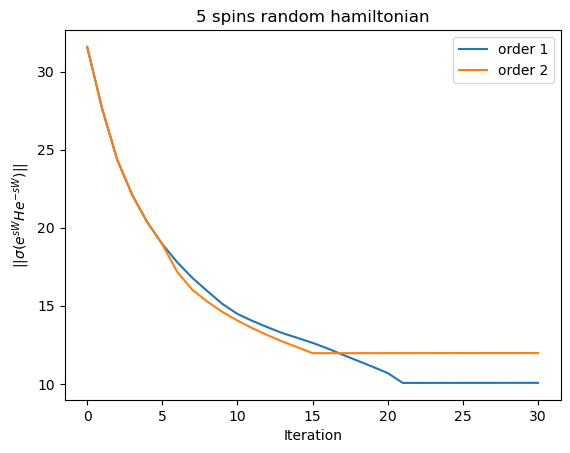

In [40]:
plt.title(str(nqubits) + ' spins random hamiltonian')
plt.plot(off_diagonal_norm_1, label='order 1')
plt.plot(off_diagonal_norm_2, label='order 2')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel(r'$|| \sigma(e^{sW}He^{-sW}) || $')

## Test on TFIM
Here we choose to customize our TFIM in the X axis using `SymbolicHamiltonian`. It is also possible to use Hadamard gate to rotate the TFIM inbuilt in `qibo`.

$$ H = -(\sum X_i X_{i+1} + \sum hZ_i)

[Qibo 0.2.7|WARNING|2024-04-03 08:14:05]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


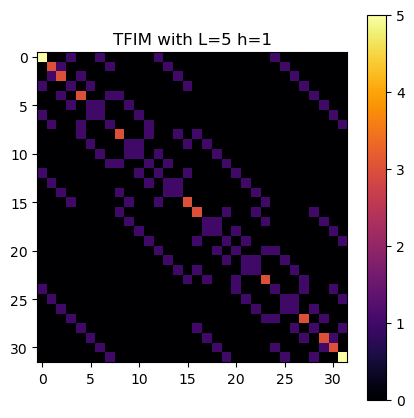

In [13]:
# generate the Hamiltonian
nqubits = 5
h = 1
H_TFIM = SymbolicHamiltonian( - h*symbols.Z(nqubits-1), nqubits=nqubits)
# add linear interaction terms
for i in range(nqubits-1):
    H_TFIM -= SymbolicHamiltonian(symbols.X(i)*symbols.X(i+1) + h*symbols.Z(i), nqubits=nqubits)
H_TFIM = H_TFIM.dense
visualize_matrix(H_TFIM.matrix, title=f'TFIM with L={nqubits} h={h}')

In [14]:
# backend
set_backend("qibojit", platform="numba")
# initialize dbi object
dbi_TFIM = DoubleBracketIteration(deepcopy(H_TFIM), scheduling=scheduling, mode=mode)

[Qibo 0.2.7|INFO|2024-04-03 08:14:05]: Using qibojit (numba) backend on /CPU:0


### Order 1: $D=\sum \alpha_iZ_i$

In [25]:
dbi_TFIM_1 = DoubleBracketIteration(deepcopy(H_TFIM), scheduling=scheduling, mode=mode)
# generate pauli_operator_dict
pauli_operator_dict = generate_pauli_operator_dict(nqubits=nqubits, parameterization_order=1)
d_coef = decompose_into_Pauli_basis(dbi_TFIM_1.h.matrix, list(pauli_operator_dict.values()))
d = sum([d_coef[i] * list(pauli_operator_dict.values())[i] for i in range(nqubits)])
grad, s = gradient_Pauli(dbi_TFIM_1, d=d, pauli_operator_dict=pauli_operator_dict)
print('The initial D coefficients:', d_coef)
print('Gradient:', grad)
print('s:', s)

[Qibo 0.2.7|WARNING|2024-04-03 08:18:25]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:18:25]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:18:25]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:18:25]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:18:25]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


100%|██████████| 500/500 [00:00<00:00, 621.13trial/s, best loss: 8.145448855938055]
The initial D coefficients: [(-1+0j), (-1+0j), (-1+0j), (-1+0j), (-1+0j)]
Gradient: [-0.22522735 -0.52101222 -0.59635378 -0.52101222 -0.22522735]
s: 0.053751929537431395


/Users/pethidine/Documents/GitHub/qibo/src/qibo/models/dbi/utils.py:268: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[i] = (


In [26]:
NSTEPS = 15
off_diagonal_norm_1 = [dbi_TFIM_1.off_diagonal_norm]
s_step = [0]
for i in range(NSTEPS):
    s, d_coef, d = gradient_descent_pauli(dbi_TFIM_1, d_coef=d_coef, d=d, pauli_operator_dict=pauli_operator_dict, max_evals=100)
    dbi_TFIM_1(step=s, d=d)
    off_diagonal_norm_1.append(dbi_TFIM_1.off_diagonal_norm)
    s_step.append(s)

100%|██████████| 500/500 [00:00<00:00, 758.68trial/s, best loss: 2.5071534830104416] 


Text(0, 0.5, '$|| \\sigma(e^{sW}He^{-sW}) || $')

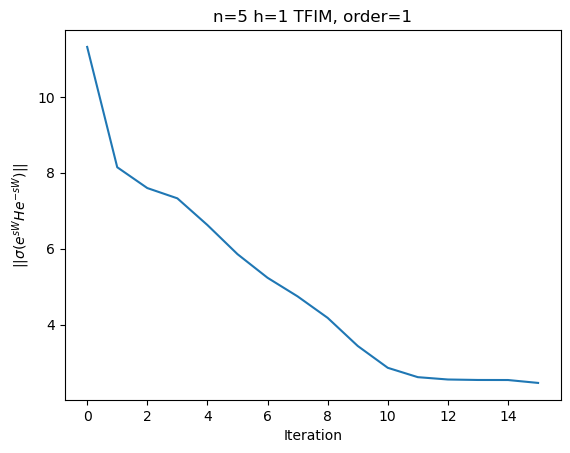

In [27]:
plt.title(f'n={nqubits} h={h} TFIM, order=1')
plt.plot(off_diagonal_norm_1)
plt.xlabel('Iteration')
plt.ylabel(r'$|| \sigma(e^{sW}He^{-sW}) || $')

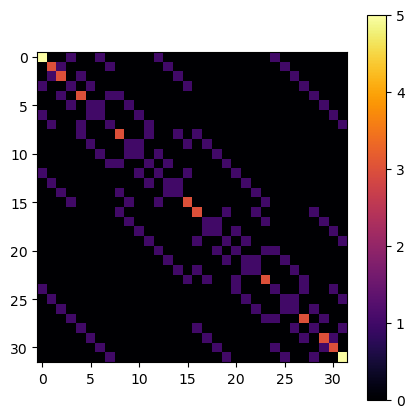

In [28]:
# the final matrix
visualize_matrix(dbi_TFIM.h.matrix)

### Order 2

In [29]:
dbi_TFIM_2 = DoubleBracketIteration(deepcopy(H_TFIM), scheduling=scheduling, mode=mode)
# generate pauli_operator_dict
pauli_operator_dict = generate_pauli_operator_dict(nqubits=nqubits, parameterization_order=2)
d_coef = decompose_into_Pauli_basis(dbi_TFIM_2.h.matrix, list(pauli_operator_dict.values()))
d = sum([d_coef[i] * list(pauli_operator_dict.values())[i] for i in range(nqubits)])
grad, s = gradient_Pauli(dbi_TFIM_2, d=d, pauli_operator_dict=pauli_operator_dict)
print('The initial D coefficients:', d_coef)
print('Gradient:', grad)
print('s:', s)

[Qibo 0.2.7|WARNING|2024-04-03 08:18:37]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:18:37]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:18:38]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:18:38]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:18:38]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:18:38]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:18:38]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-04-03 08:18:38]: Calculating the dens

100%|██████████| 500/500 [00:00<00:00, 722.72trial/s, best loss: 8.144335598357657]
The initial D coefficients: [(-1+0j), (-1+0j), (-1+0j), (-1+0j), (-1+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]
Gradient: [-0.22563381 -0.52082675 -0.5963705  -0.52082675 -0.22563381  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
s: 0.052813741396418624


In [30]:
NSTEPS = 15
off_diagonal_norm_2 = [dbi_TFIM_2.off_diagonal_norm]
s_step = [0]
for i in range(NSTEPS):
    s, d_coef, d = gradient_descent_pauli(dbi_TFIM_2, d_coef=d_coef, d=d, pauli_operator_dict=pauli_operator_dict, max_evals=100)
    dbi_TFIM_2(step=s, d=d)
    off_diagonal_norm_2.append(dbi_TFIM_2.off_diagonal_norm)
    s_step.append(s)

100%|██████████| 500/500 [00:00<00:00, 736.96trial/s, best loss: 2.4545260560650717] 


Text(0, 0.5, '$|| \\sigma(e^{sW}He^{-sW}) || $')

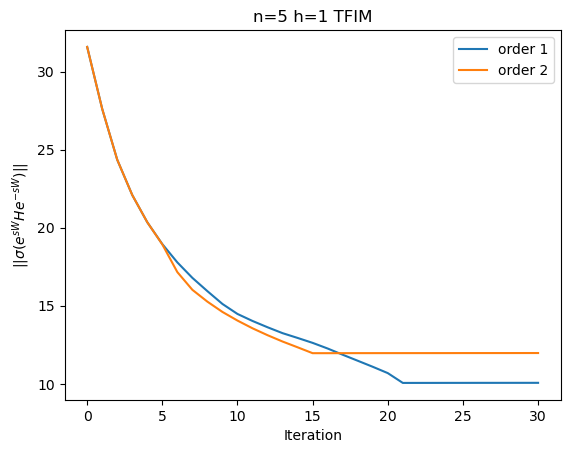

In [41]:
plt.title(f'n={nqubits} h={h} TFIM')
plt.plot(off_diagonal_norm_1, label='order 1')
plt.plot(off_diagonal_norm_2, label='order 2')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel(r'$|| \sigma(e^{sW}He^{-sW}) || $')

## Different initial `d`
Next, we show the effect of different choices of the initial direction of the gradient descent method.

In [ ]:
H = H_TFIM.matrix
L = int(np.log2(H.shape[0]))
N = np.diag(np.linspace(np.min(np.diag(H)),np.max(np.diag(H)),2**L))
d_coef = onsite_Z_decomposition(N, onsite_Z_ops)
print(d_coef)
d = sum([d_coef[i] * onsite_Z_ops[i] for i in range(nqubits)])

[(-2.580645161290323+0j), (-1.2903225806451613+0j), (-0.6451612903225807+0j), (-0.32258064516129037+0j), (-0.16129032258064518+0j)]


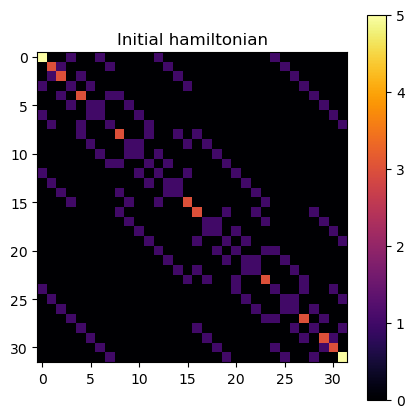

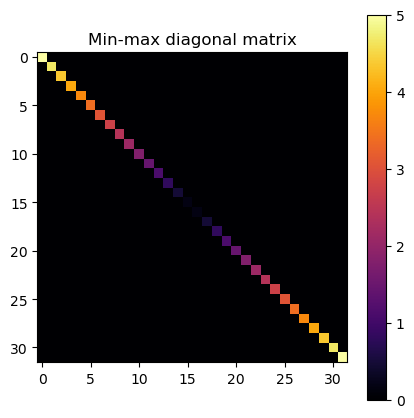

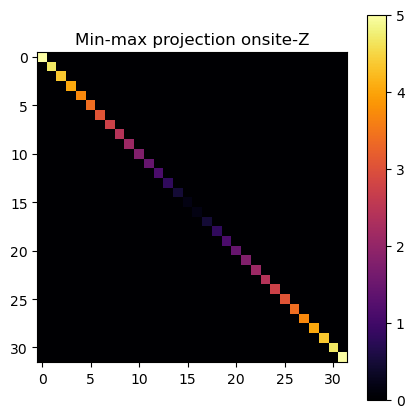

In [ ]:
visualize_matrix(H, 'Initial hamiltonian')
visualize_matrix(N, 'Min-max diagonal matrix')
visualize_matrix(d, 'Min-max projection onsite-Z')

Here we see that the min-max diagonal operator can be correctly decomposed into onsite-Z operators. Then we generate the diagonalization curve and compare with other initializations.

In [ ]:
# backend
set_backend("qibojit", platform="numba")
# initialize dbi object
dbi_TFIM_MMH = DoubleBracketIteration(deepcopy(H_TFIM), scheduling=scheduling, mode=mode)

[Qibo 0.2.7|INFO|2024-03-26 16:08:28]: Using qibojit (numba) backend on /CPU:0


In [ ]:
NSTEPS = 15
off_diagonal_norm_MMH = [dbi_TFIM_MMH.off_diagonal_norm]
s_step_MMH = [0]
# d = np.diag(np.linspace(np.min(np.diag(dbi_TFIM_MMH.h.matrix)),np.max(np.diag(dbi_TFIM_MMH.h.matrix)),2**nqubits))
# d_coef = onsite_Z_decomposition(d, onsite_Z_ops)
for _ in range(NSTEPS):
    d = np.diag(np.linspace(np.min(np.diag(dbi_TFIM_MMH.h.matrix)),np.max(np.diag(dbi_TFIM_MMH.h.matrix)),2**nqubits))
    d_coef = onsite_Z_decomposition(d, onsite_Z_ops)
    s, d_coef, d = gradient_descent_onsite_Z(dbi_TFIM_MMH, d_coef, d, onsite_Z_ops=onsite_Z_ops, max_evals=100)
    dbi_TFIM_MMH(d=d, step=s)
    off_diagonal_norm_MMH.append(dbi_TFIM_MMH.off_diagonal_norm)
    s_step_MMH.append(s)
    print(f"New optimized step at iteration {_+1}/{NSTEPS}: {s} with d_coef {d_coef}, loss {dbi_TFIM_MMH.off_diagonal_norm}")

100%|██████████| 500/500 [00:00<00:00, 688.27trial/s, best loss: 9.336239342915379]
New optimized step at iteration 1/15: 0.039240166337035656 with d_coef [(-2.3180340693309422+0j), (-0.9042157574954297+0j), (-0.6267094129284807+0j), (-0.37510402952816974+0j), (-0.16137910360026844+0j)], loss 9.263805656974093
100%|██████████| 500/500 [00:00<00:00, 654.86trial/s, best loss: 8.253271106315344] 
New optimized step at iteration 2/15: 0.0636971166898561 with d_coef [(-2.8893154826347565+0j), (-1.3328071932958503+0j), (-0.5996311871447069+0j), (-0.38812640871658144+0j), (-0.16592899239661785+0j)], loss 8.248988639626276
100%|██████████| 500/500 [00:00<00:00, 705.90trial/s, best loss: 7.820911729728226] 
New optimized step at iteration 3/15: 0.026774099108320803 with d_coef [(-3.9047191557345737+0j), (-1.3620955366051533+0j), (-1.094932722170599+0j), (-0.5744178736473565+0j), (-0.04727696085745736+0j)], loss 7.79237041903216
100%|██████████| 500/500 [00:00<00:00, 522.76trial/s, best loss: 7.

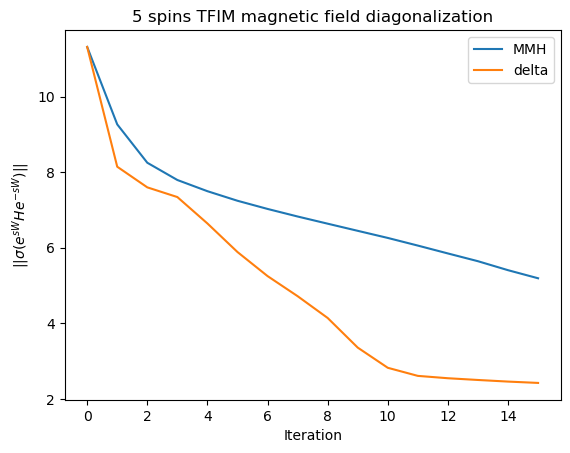

In [ ]:
plt.title(str(nqubits) + ' spins TFIM magnetic field diagonalization')
plt.plot(off_diagonal_norm_MMH, label='MMH')
plt.plot(off_diagonal_norm_delta, label='delta')
plt.xlabel('Iteration')
plt.ylabel(r'$|| \sigma(e^{sW}He^{-sW}) || $')
plt.legend()

## Effect of `n`

[Qibo 0.2.7|INFO|2024-03-26 16:08:41]: Using qibojit (numba) backend on /CPU:0


Initial off diagonal norm 31.576176740060667


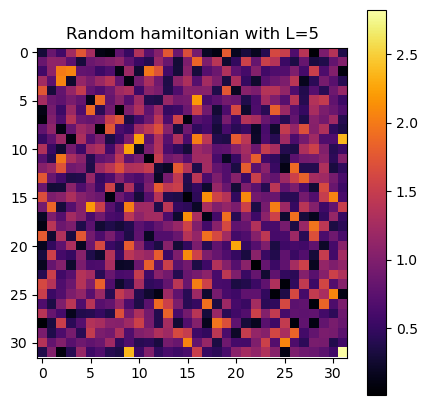

In [ ]:
# backend
set_backend("qibojit", platform="numba")
# initialize dbi object
nqubits = 5
h0 = random_hermitian(2**nqubits, seed=2)
scheduling = DoubleBracketScheduling.hyperopt
mode = DoubleBracketGeneratorType.single_commutator
n_1 = 5
n_2 = 3
dbi_1 = DoubleBracketIteration(Hamiltonian(nqubits=nqubits, matrix=h0), scheduling=scheduling, mode=mode)
dbi_2 = DoubleBracketIteration(Hamiltonian(nqubits=nqubits, matrix=h0), scheduling=scheduling, mode=mode)
print("Initial off diagonal norm", dbi_1.off_diagonal_norm)
visualize_matrix(dbi_1.h.matrix, title=f'Random hamiltonian with L={nqubits}')

In [ ]:
# generate the onsite Z operators
onsite_Z_ops = generate_onsite_Z_ops(nqubits)
d_coef = onsite_Z_decomposition(dbi.h.matrix, onsite_Z_ops)
d = sum([d_coef[i] * onsite_Z_ops[i] for i in range(nqubits)])
grad, s = gradient_onsite_Z(dbi,d,n=5, onsite_Z_ops=onsite_Z_ops)
print('The initial D coefficients:', d_coef)
print('Gradient:', grad)
print('s:', s)

[Qibo 0.2.7|WARNING|2024-03-26 16:08:41]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-03-26 16:08:41]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-03-26 16:08:41]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-03-26 16:08:41]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-03-26 16:08:41]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


100%|██████████| 500/500 [00:00<00:00, 697.70trial/s, best loss: 9.558186537868679] 
The initial D coefficients: [(-3.321354431855655-1.7961649980378765e-16j), (-0.7143725995296772+3.608986798092513e-17j), (0.472710854506152+9.347215093087467e-17j), (-0.5707798509274735-1.3813111045761499e-17j), (0.34536980200226214-1.1499770144849896e-16j)]
Gradient: [ 0.65534217  0.16603388 -0.31270245  0.27247095  0.60904527]
s: 0.024282460160549718


In [ ]:
iters = 30
d_coef_1, d_1 = d_coef, d
d_coef_2, d_2 = d_coef, d

off_diagonal_norm_1 = [dbi_1.off_diagonal_norm]
off_diagonal_norm_2 = [dbi_2.off_diagonal_norm]
s_step_1 = [0]
s_step_2 = [0]
for i in range(iters):
    s_1, d_coef_1, d_1 = gradient_descent_onsite_Z(dbi_1, d_coef_1, d_1, onsite_Z_ops=onsite_Z_ops, n=n_1, max_evals=100)
    s_2, d_coef_2, d_2 = gradient_descent_onsite_Z(dbi_2, d_coef_2, d_2, onsite_Z_ops=onsite_Z_ops, n=n_2, max_evals=100)
    dbi_1(step=s_1, d=d_1)
    dbi_2(step=s_2, d=d_2)
    off_diagonal_norm_1.append(dbi_1.off_diagonal_norm)
    off_diagonal_norm_2.append(dbi_2.off_diagonal_norm)
    s_step_1.append(s_1)
    s_step_2.append(s_2)

100%|██████████| 500/500 [00:00<00:00, 723.56trial/s, best loss: 7.305839659415738] 


Text(0, 0.5, '$|| \\sigma(e^{sW}He^{-sW}) || $')

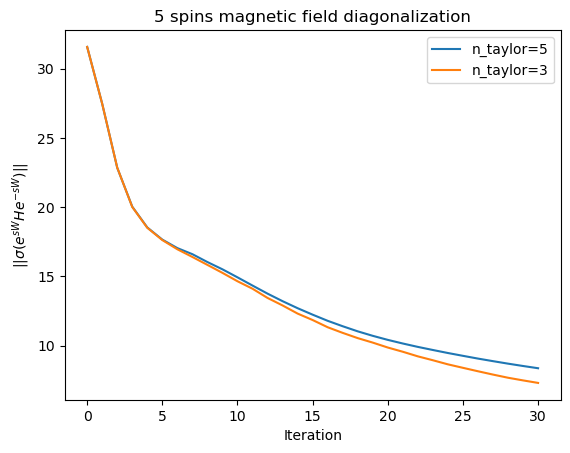

In [ ]:
plt.title(str(nqubits) + ' spins magnetic field diagonalization')
plt.plot(off_diagonal_norm_1, label=f'n_taylor={n_1}')
plt.plot(off_diagonal_norm_2, label=f'n_taylor={n_2}')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel(r'$|| \sigma(e^{sW}He^{-sW}) || $')